# Calculate correlation functions with CCL
In this example, we will calculate clustering and lensing correlation functions for an example cosmology.

In [1]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Define a cosmology and source number density
First, we define a set of cosmological parameters.

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

The angular power spectrum is weighted by the source number density as a function of redshift, dN/dz. We define an example here.

In [3]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution
b = 1.5*np.ones(200)

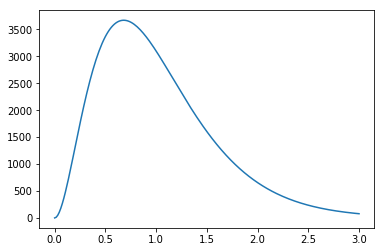

In [4]:
plt.plot(z, dNdz)
plt.show()

### Create Tracer objects
CCL manages auto- and cross-spectrum calculations through `Tracer` objects. For the sake of this example we will define two tracers: one for lensing and one for clustering.

In [6]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz))
clu1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdz), bias=(z,b))

The argument set to `False` in the first statement specifies that we are ignoring intrinsic alignments. For the clustering tracer, we are excluding both RSD and magnification bias with the two `False` statements.
If we wanted to include intrinsic alignments, we could have created the `ClTracer` object in the following way:

In [8]:
bias_ia = -0.01* np.ones(z.size) # Intrinsic alignment bias factor
f_red = 0.2 * np.ones(z.size) # Fraction of red galaxies
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz), ia_bias=(z, bias_ia), red_frac=(z, f_red))

### Obtain angular power spectra
Before computing the correlation functions, we need to obtain the angular power spectra of the tracers.

In [9]:
ell = np.arange(2, 100)
cls = ccl.angular_cl(cosmo, lens1, lens1, ell)
cls_ia = ccl.angular_cl(cosmo, lens1_ia, lens1_ia, ell)
cls_clu = ccl.angular_cl(cosmo, clu1, clu1, ell)

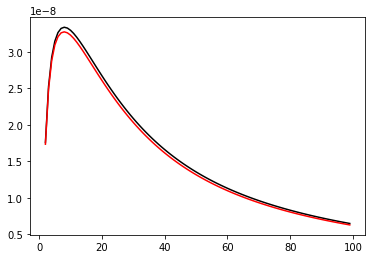

In [10]:
plt.plot(ell, cls, 'k-')
plt.plot(ell, cls_ia, 'r-')
plt.show()

### Calculate the correlation functions
We can now calculate the correlation functions for the tracers. 

In [11]:
theta_deg = np.logspace(-1, np.log10(5.), 20) # Theta is in degrees

xi_plus = ccl.correlation(cosmo, ell, cls, theta_deg, corr_type='L+', method='FFTLog')
xi_plus_ia = ccl.correlation(cosmo, ell, cls_ia, theta_deg, corr_type='L+', method='FFTLog')
xi_minus = ccl.correlation(cosmo, ell, cls, theta_deg, corr_type='L-', method='FFTLog')

xi_clu = ccl.correlation(cosmo, ell, cls_clu, theta_deg, corr_type='GG', method='FFTLog')

We can then plot the correlations, first for lensing:

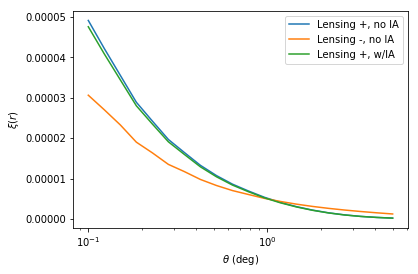

In [12]:
plt.plot(theta_deg, xi_plus, label='Lensing +, no IA')
plt.plot(theta_deg, xi_minus, label='Lensing -, no IA')
plt.plot(theta_deg, xi_plus_ia, label='Lensing +, w/IA')

plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\xi (r)$')
plt.show()

And then for galaxy-galaxy clustering:

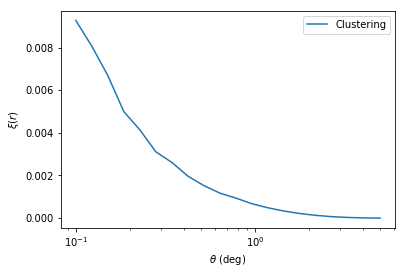

In [13]:
plt.plot(theta_deg, xi_clu, label='Clustering')

plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\xi (r)$')
plt.show()